# Trabajo Práctico 2 - Minería de Datos
#Año 2023 TUIA
## Integrantes
- Enzo Ferrari
- Micaela Mailen Pozzo

## Descripción
El trabajo consiste en la aplicación de los conocimientos adquiridos en las unidades 4 y 5 de la materia en dos datasets:
- 1000_Companies.csv
- PokemonDB.csv

## Primera parte: Análisis de datos
Primero, debemos analizar y estandarizar los conjuntos de datos

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_companies = pd.read_csv('/content/1000_Companies.csv')


In [ ]:
data_companies.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [ ]:
data_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


# Dataset: 1000_companies.csv
Link de kaggle: https://www.kaggle.com/datasets/sadikaljarif/1000-companiescsv
## Descripción
Este dataset consiste en datos de 1000 companías start-up
### Atributos
- R&D Spend: Este atributo representa la cantidad de dinero que una startup gasta en investigación y desarrollo.
- Administration: Este atributo representa la cantidad de dinero que una startup gasta en tareas administrativas y gastos operacionales.
- Marketing Spend: Este atributo representa la cantidad de dinero que una startup invierte en marketing y promociones.
- State : Este atributo representa el estado en donde la startup opera.
- Profit: Representa las ganancias de una startup. Indica la pérdida o ganancia generados por la companía en el intervalo de tiempo especificado para la toma de estos datos.

Nuestra variable objetivo será Profit


## Análisis de distribución

Text(0.5, 1.0, 'Distribución de companías según State')

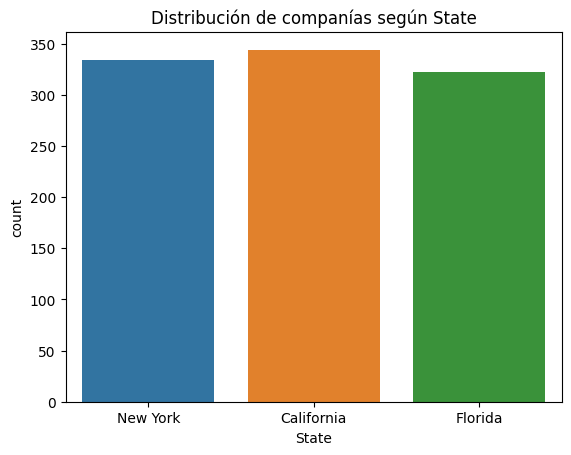

In [ ]:
sns.countplot(data_companies, x='State')
plt.title('Distribución de companías según State')

Los datos están balanceados respecto a localidad.

array([[<Axes: title={'center': 'RyD_Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'MarketingSpend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

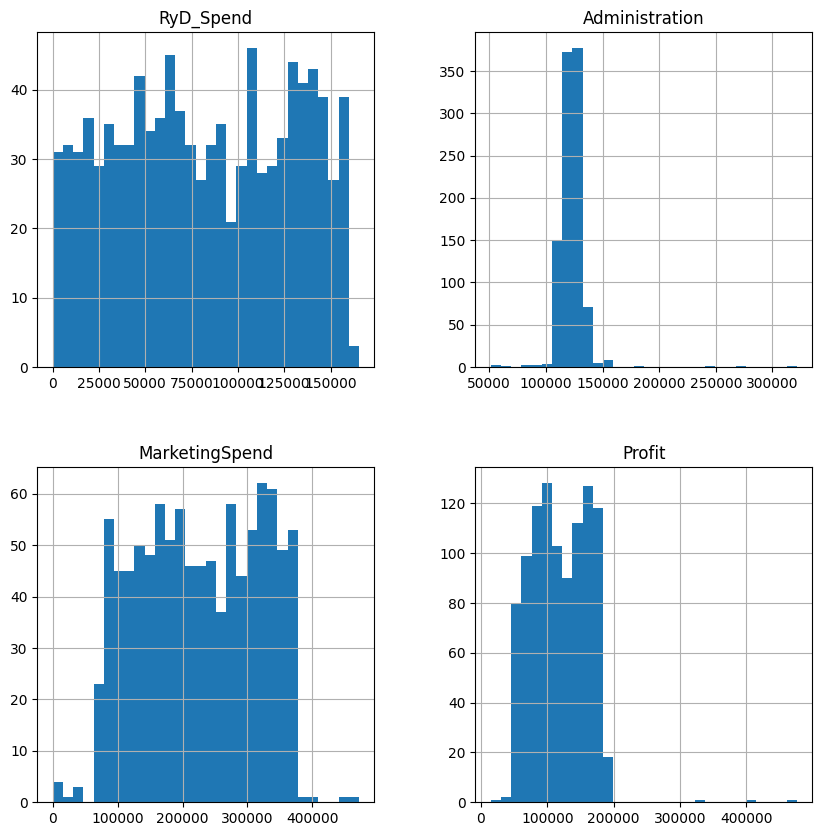

In [ ]:
# Visualizar variables numéricas
numerical = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']
data_companies[numerical].hist(bins=30, figsize=(10,10))

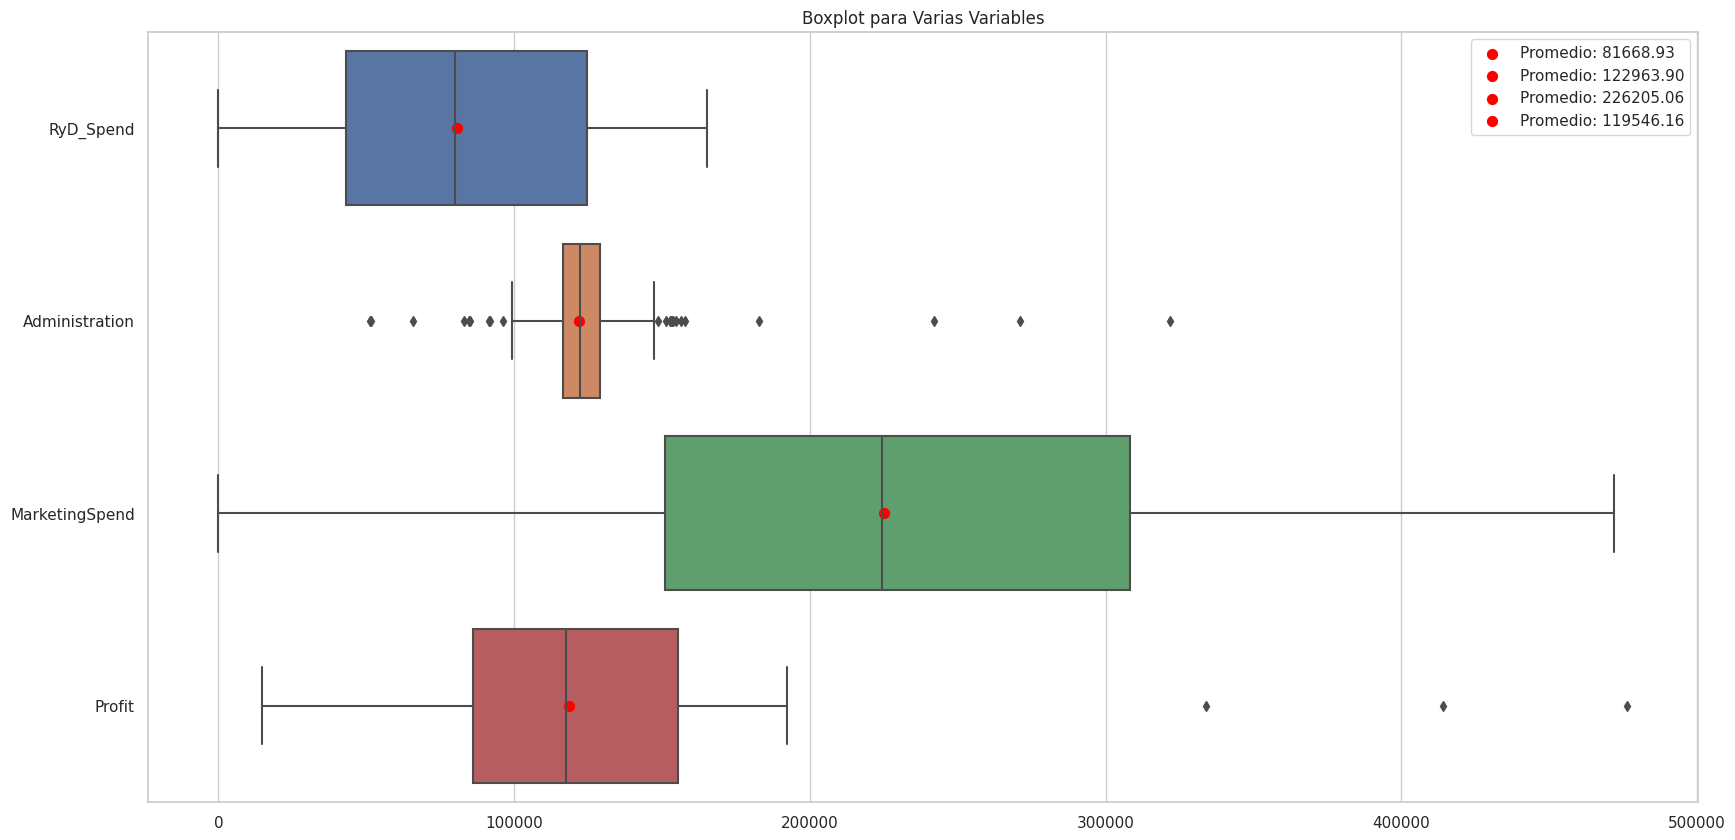

In [ ]:
df_numericas = data_companies[numerical]

means = df_numericas.mean()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))  # Tamaño del gráfico
ax = sns.boxplot(data=df_numericas, orient="h")

for i, mean in enumerate(means):
    ax.scatter(mean-1000, i, color='red', marker='o', s=50, label=f'Promedio: {mean:.2f}')
plt.yticks(range(len(df_numericas.columns)), df_numericas.columns)
plt.title("Boxplot para Varias Variables")
plt.legend(loc='upper right')

plt.show() # Muestra el gráfico

## Distribución y outliers
Casi todas las variables tienen distribución modal, excepto por R&D. Aun así, podemos usar estandarización z-score.

Solo una variable tiene una cantidad considerable de outliers: Administration. Decidimos primero realizar el trabajo sin tratar outliers.

## Distribución de las variables respecto a nuestra variable objetivo

Text(0.5, 1.0, 'Profit según State')

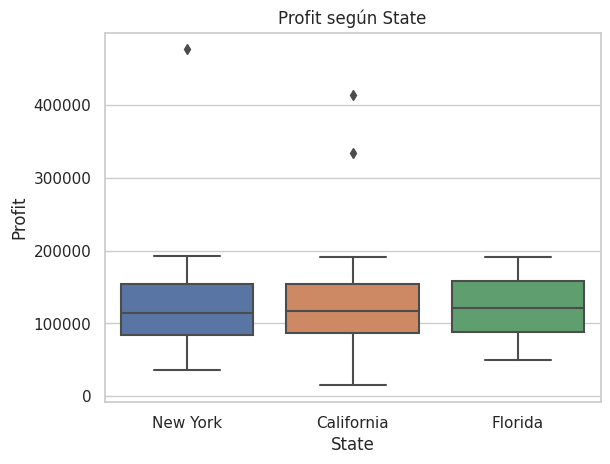

In [ ]:
# Variable categórica State
sns.boxplot(data_companies, x='State', y='Profit')
plt.title('Profit según State')

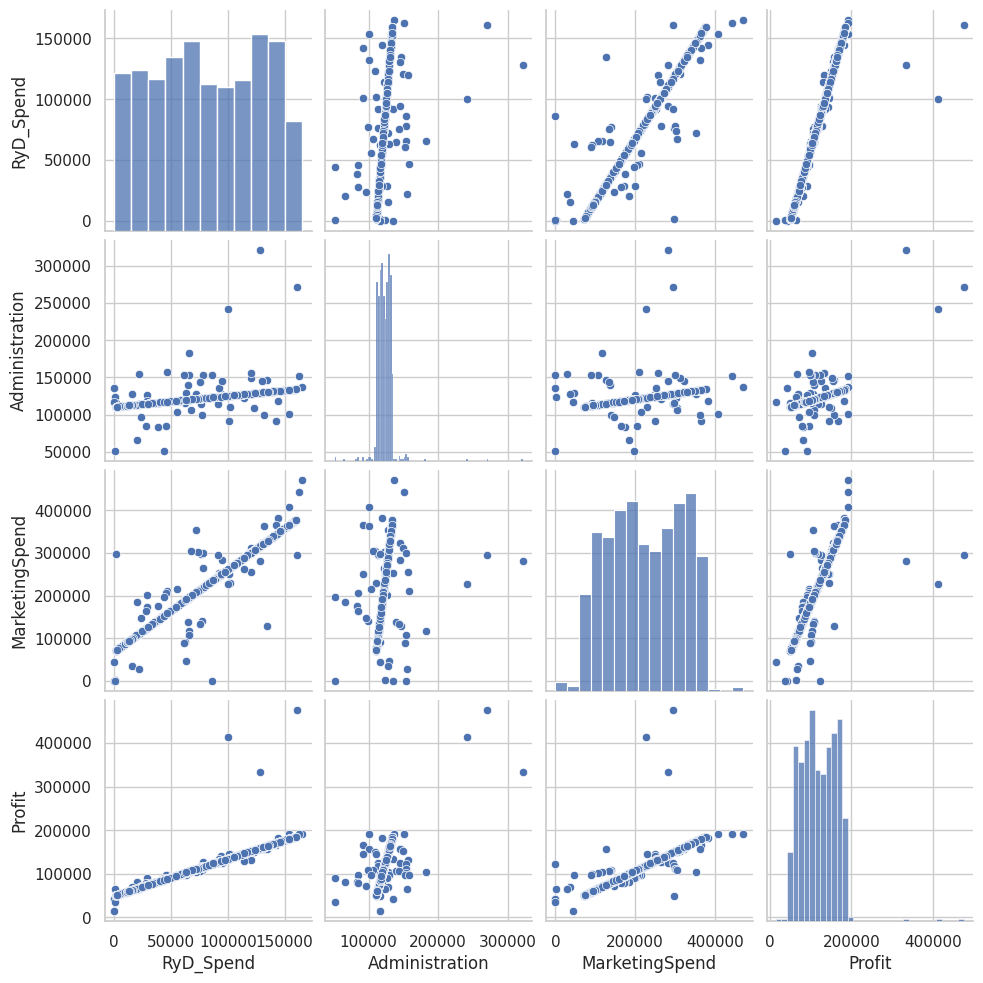

In [ ]:
sns.pairplot(data_companies)

Vemos fuertes relaciones entre todas las variables, veamos las correlaciones

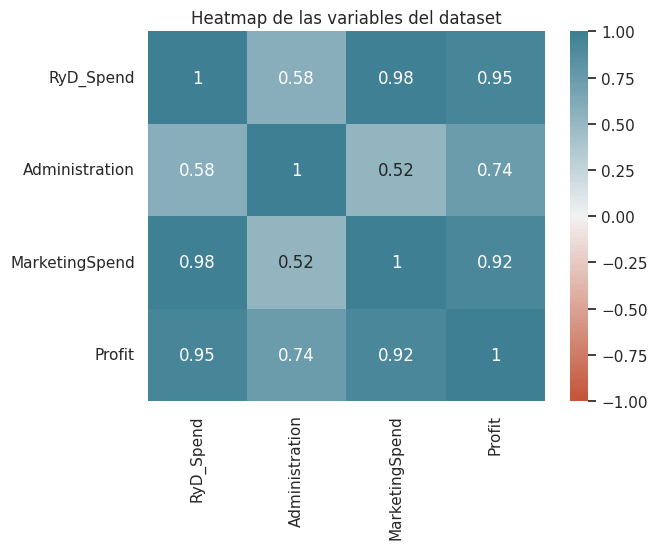

In [ ]:
# Buscar correlación entre las variables numéricas:
matrix_corr = data_companies.drop(['State'], axis=1).corr()
ax = sns.heatmap(
    matrix_corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    annot=True
)
plt.title('Heatmap de las variables del dataset')
plt.show()


## Conclusión
Analizando distribuciones, concluímos que podemos dejar el tratamiento de outliers luego de aplicar los métodos, y que podemos estandarizar mediante z-score.

Analizando correlaciones, vemos que existen fuertes correlaciones entre las variables, hay que tener en cuenta el problema de la multicolinearidad en la evaluación de los modelos.

También observamos que existe una alta correlación entre la variable objetivo y las variables explicativas, algo a tener en cuenta más adelante.

## Estandarización
Como dijimos, decidimos usar z-score.



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_explicative = numerical
# Inicializamos la instancia
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_companies[numerical_explicative])

data_companies[numerical_explicative] = scaled_data

In [ ]:
data_companies

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,1.799023,1.105197,2.682968,New York,1.696301
1,1.739869,2.253692,2.378316,California,1.685343
2,1.543022,-1.730568,1.985407,Florida,1.668041
3,1.348048,-0.340433,1.715177,New York,1.477956
4,1.299351,-2.504210,1.529110,Florida,1.088053
...,...,...,...,...,...
995,-0.591946,-0.357871,-0.578727,California,-0.566079
996,1.145907,0.589023,1.125271,California,1.044865
997,0.400018,9.435756,0.010245,California,6.867965
998,1.005869,15.759379,0.606202,California,5.001869


## Codificación de variables categóricas
State es nuestra única variable categórica, decidimos usar one-hot encoding

In [ ]:
data_companies_regression = pd.get_dummies(data_companies)

# Ejercicio 2
Realizar la estimación de Profit usando un árbol de decisión para regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from graphviz import Source

xCompanies = data_companies_regression.drop('Profit', axis=1)
yCompanies = data_companies_regression['Profit']
xCompaniesTrain, xCompaniesTest, yCompaniesTrain, yCompaniestReal = train_test_split(xCompanies, yCompanies, test_size=0.2)
tree_reg = DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13,
min_samples_leaf=1, min_samples_split=2)
tree_reg.fit(xCompaniesTrain, yCompaniesTrain)
yCompaniesPred = tree_reg.predict(xCompaniesTest)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yCompaniestReal, yCompaniesPred))
print('Mean Squared Error:', metrics.mean_squared_error(yCompaniestReal, yCompaniesPred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yCompaniestReal, yCompaniesPred)))
tableResult = pd.DataFrame({'Actual':yCompaniestReal, 'Predicted':yCompaniesPred})
tableResult

Mean Absolute Error: 0.04485064284214902
Mean Squared Error: 0.003529488509697507
Root Mean Squared Error: 0.05940949848044088


,Actual,Predicted
627,-0.184363,-0.217497
764,-0.174757,-0.217497
417,-0.920612,-0.882677
967,-1.052581,-1.077129
51,-0.872245,-0.882677
...,...,...
219,-1.430530,-1.392196
62,-0.786232,-0.764455
254,1.045782,1.134926
12,0.514131,0.286299


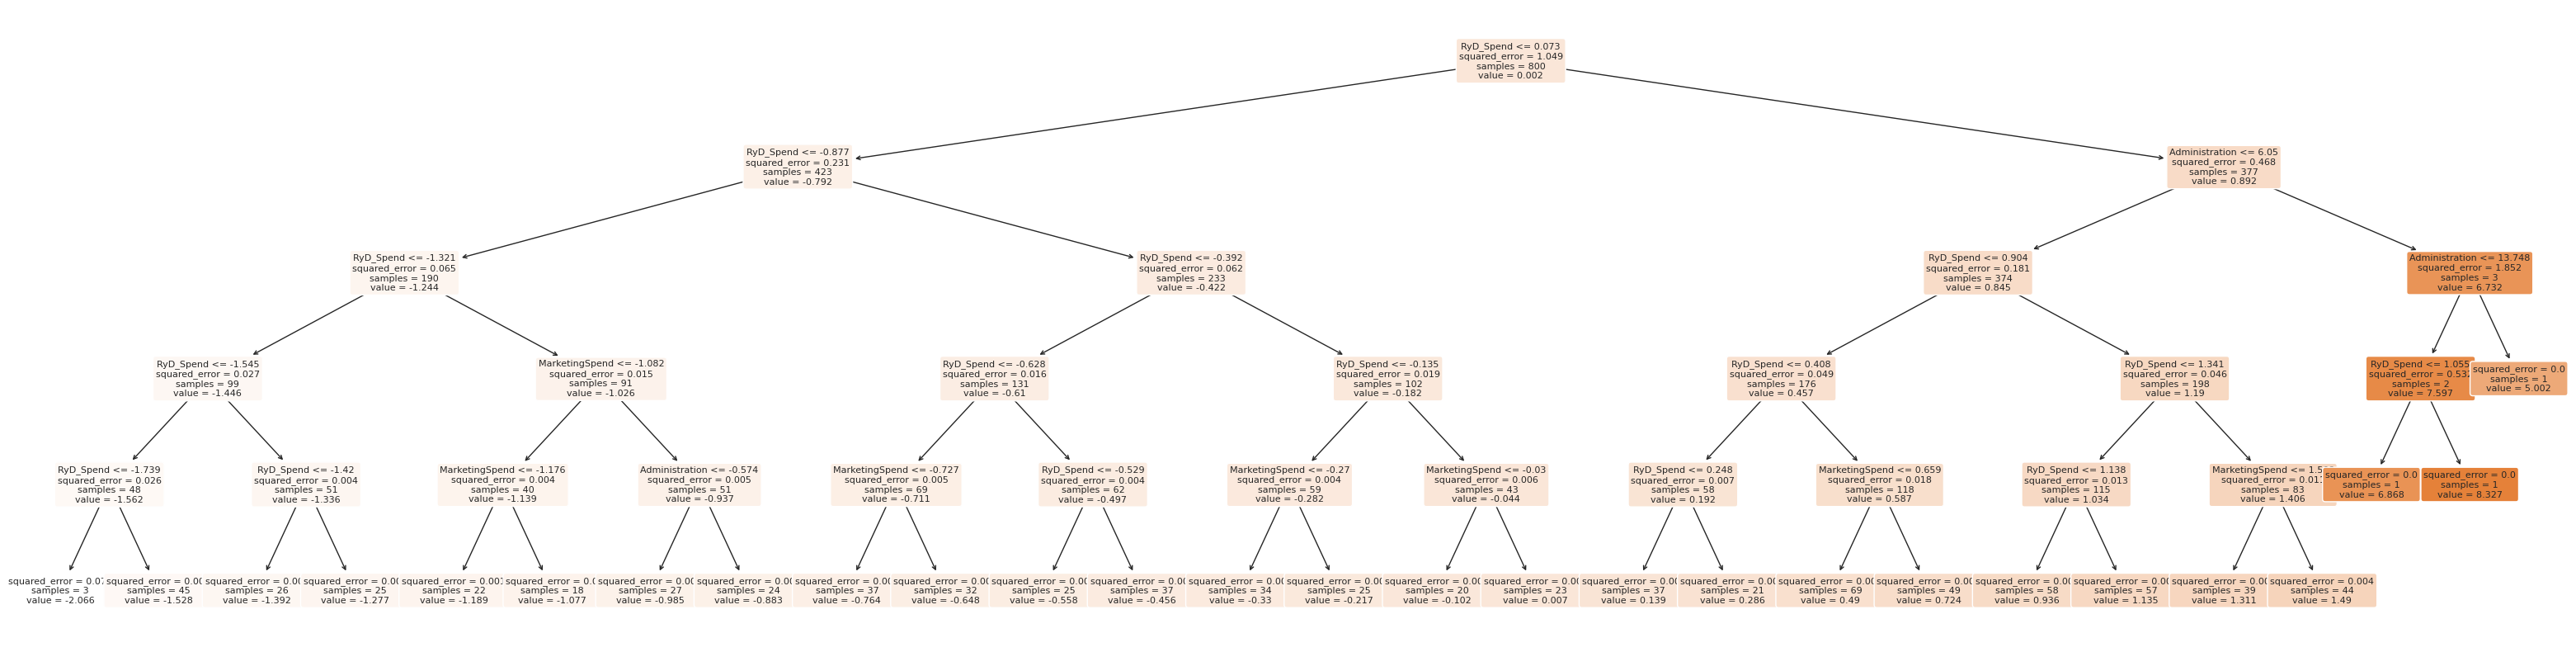

In [ ]:
from sklearn import tree

plt.figure(figsize=(40,10))
tree.plot_tree(tree_reg,
                feature_names=xCompanies.columns,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Este primer árbol, con los parámetros por defecto, resulta muy dificil de leer, además de poder tener problemas de overfitting. Probemos revisar los hiperparámetros.

Entre todos los parámetros:
- max_depth: profundidad máxima.
- min_sample_split: el número mínimo de datos que debe tener un nodo para dividirse.
- max_sample_leaf: número mínimo de datos necesarios para que un nodo sea considerado hoja.

Si bien un árbol de regresión con mucha profundidad termina encontrando predicciones más precisas, tenemos que tener en cuenta que un árbol con una profundidad muy grande puede llegar a causar overfitting (bajo error de aprendizaje, alto error de testeo).

De la misma manera, los otros parámetros pueden también causar underfitting.

## Optimización de hiperparámetros
Busquemos los hiperparámetros que ajusten mejor el modelo

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}


grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xCompaniesTrain, yCompaniesTrain)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xCompaniesTest)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(yCompaniestReal, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7}
Error cuadrático medio (MSE) en el conjunto de prueba: 0.001140903832241247


Como vemos, estos valores dividen mejor al conjunto de datos. Sin embargo, para poder explicarlo mejor decidimos dejar a max_depth con un valor de 5. Veamos cómo da el modelo con estos parámetros

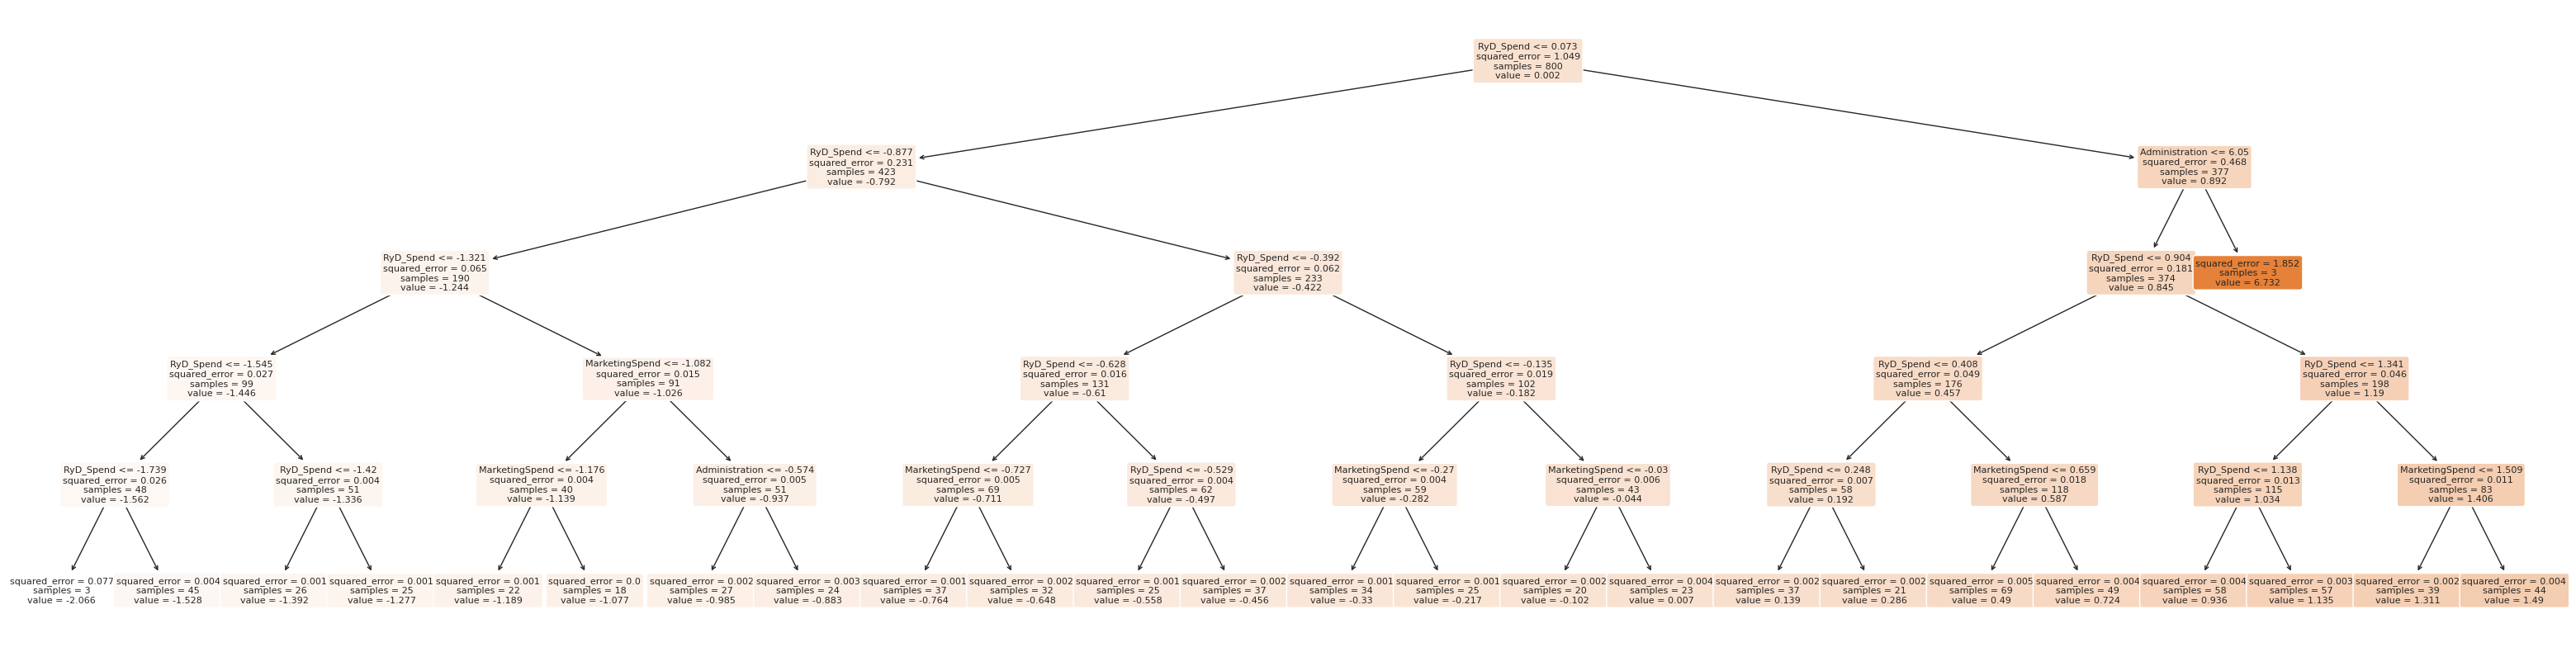

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13,
min_samples_leaf=2, min_samples_split=5)
tree_reg.fit(xCompaniesTrain, yCompaniesTrain)
yCompaniesPred = tree_reg.predict(xCompaniesTest)

plt.figure(figsize=(40,10))
tree.plot_tree(tree_reg,
                feature_names=xCompanies.columns,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

# Conclusiones
Como podemos ver, los cortes más importantes se hacen sobre la categoría RyD spend. Más aún, parece ser que casi todos los cortes se hacen sobre esta categoría, además de Marketing_spend. Esto puede significar que lo que mejor explica cuanto gana cada companía sea la inversión en investigación.

Sin embargo, hay que tener en cuenta ciertos factores, como por ejemplo, la correlación. Hemos visto que la variable objetivo tiene alta correlación con todas las variables explicativas. De esto podemos concluir que tal vez un modelo de regresión lineal sea mejor para explicar estos datos, y que también no necesariamente RyD explica mejor que el resto de variables el dataset.

Analizemos también la importancia de las features.

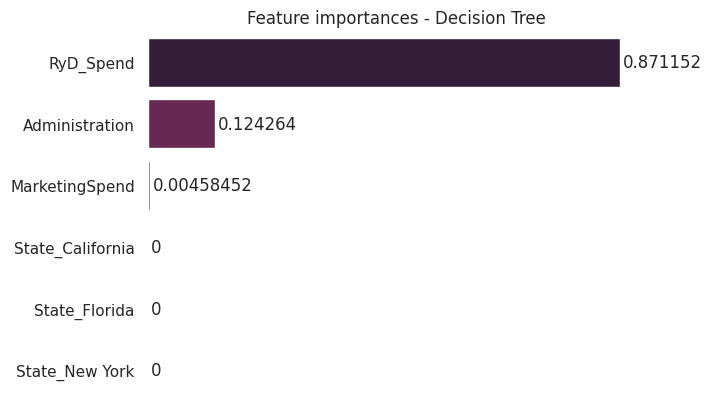

In [ ]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': xCompanies.columns, 'importances': tree_reg.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

Evaluación del modelo en dos conjuntos de test, veamos las métricas del modelo óptimo en otros datos de test

In [ ]:
# Split del dataset
xCompaniesTrain2, xCompaniesTest2, yCompaniesTrain2, yCompaniestReal2 = train_test_split(xCompanies, yCompanies, test_size=0.2)
tree_reg = DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13,
min_samples_leaf=1, min_samples_split=2)
tree_reg.fit(xCompaniesTrain2, yCompaniesTrain2)
yCompaniesPred2 = tree_reg.predict(xCompaniesTest2)

#Métricas
print('Segundos datos')
print('Mean Absolute Error:', metrics.mean_absolute_error(yCompaniestReal2, yCompaniesPred2))
print('Mean Squared Error:', metrics.mean_squared_error(yCompaniestReal2, yCompaniesPred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yCompaniestReal2, yCompaniesPred2)))
print('Primeros datos')
print('Mean Absolute Error:', metrics.mean_absolute_error(yCompaniestReal, yCompaniesPred))
print('Mean Squared Error:', metrics.mean_squared_error(yCompaniestReal, yCompaniesPred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yCompaniestReal, yCompaniesPred)))


Segundos datos
Mean Absolute Error: 0.046514712155208165
Mean Squared Error: 0.00376585342583497
Root Mean Squared Error: 0.06136654973057366
Primeros datos
Mean Absolute Error: 0.04485064284214902
Mean Squared Error: 0.003529488509697507
Root Mean Squared Error: 0.05940949848044088


Como podemos ver, se evaluó el performance del modelo en dos conjuntos de test distintos. Teniendo en cuenta que el árbol fue entrenado con el primer conjunto, es de esperar que las métricas den distinto. Aún así, para este dataset, los errores fueron bastante bajos.

Teniendo en cuenta que estamos trabajando con árboles de decisión, a veces conviene considerar tomar el árbol que tenga un mayor capacidad explicativa a pesar de tener un error más grande. Aun así, este es minúsculo. Esto puede ser debido a la alta correlación que tiene la variable objetivo con el resto de variables.

Respecto a los outliers, decidimos que al tener el modelo un error tan bajo no es necesario, aunque observemos que algunos cortes se hacen para separar outliers, lo que puede o no ser información útil.

# Ejercicio 3
# Dataset : Pokemon
Este dataset cuenta con  información sobre atributos y características de los Pokemones.
## Variables
- Name:  nombre de cada Pokémon.
- Type:  tipo o categoría del Pokémon.
- HP:  puntos de salud (Hit Points) del Pokémon.
- Attack:  capacidad de ataque del Pokémon.
- Defense: capacidad de defensa del Pokémon.
- Sp. Atk: capacidad especial de ataque del Pokémon
- Sp. Def: capacidad especial de defensa del Pokémon
- Speed:  velocidad del Pokémon

In [ ]:
# Importamos el dataset de Pokémon desde el archivo CSV
df2 = pd.read_csv("/content/PokemonDB.csv")

In [ ]:
# Mostrar las primeras filas del dataset para obtener una vista previa de los datos
df2.head()

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


In [ ]:
# Mostrar información sobre el dataset, incluyendo la cantidad de filas, columnas y tipos de datos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [ ]:
# Realizar un resumen estadístico de las variables numéricas del dataset
df2.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [ ]:
# Obtener los tipos de Pokémon únicos presentes en la columna 'Type'
df2['Type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [ ]:
# Creamps un diccionario para asignar un número único a cada tipo de Pokémon

type_list = list(df2['Type'].unique())
target_names = {}
# Recorrer la lista de tipos de Pokémon y enumerarlos
for n, type in enumerate(type_list):
    # Asignar un número único (índice) a cada tipo y almacenarlo en el diccionario 'target_names'
    target_names[type] = n


#df2.columns
target_names

{'Grass': 0,
 'Fire': 1,
 'Water': 2,
 'Bug': 3,
 'Normal': 4,
 'Dark': 5,
 'Poison': 6,
 'Electric': 7,
 'Ground': 8,
 'Ice': 9,
 'Fairy': 10,
 'Steel': 11,
 'Fighting': 12,
 'Psychic': 13,
 'Rock': 14,
 'Ghost': 15,
 'Dragon': 16,
 'Flying': 17}

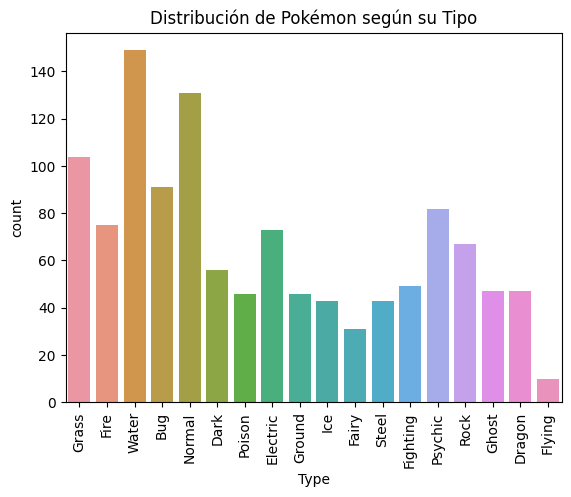

In [ ]:
# Importamos laas librerias necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un countplot para visualizar la distribución de Pokémon según su tipo
sns.countplot(data=df2, x='Type')

# Rotar las etiquetas en el eje x en 90 grados para mejorar la legibilidad
plt.xticks(rotation=90)

# Agregar un título al gráfico
plt.title('Distribución de Pokémon según su Tipo')

# Mostrar el gráfico
plt.show()

A partir de este gráfico, podemos obtener una visión clara de la cantidad de Pokémon que pertenecen a cada tipo en el dataset. Al analizar el gráfico, notamos que el tipo de Pokémon con la mayor representación es 'Water', con más de 140 ejemplares, lo que lo convierte en el tipo más abundante. Por otro lado, el tipo 'Flying' tiene la menor presencia en el conjunto de datos, con menos de 20 Pokémon de ese tipo.

Esto nos indica un problema de desbalanceo en nuestro dataset, lo que puede complicar nuestros modelos de clasificación.

<ipython-input-7-f565b82373d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.462999  0.323889  0.351247  0.388853  0.177610
Attack   0.462999  1.000000  0.469056  0.340029  0.271215  0.371056
Defense  0.323889  0.469056  1.000000  0.225578  0.534822  0.013146
Sp. Atk  0.351247  0.340029  0.225578  1.000000  0.518185  0.431643
Sp. Def  0.388853  0.271215  0.534822  0.518185  1.000000  0.229641
Speed    0.177610  0.371056  0.013146  0.431643  0.229641  1.000000


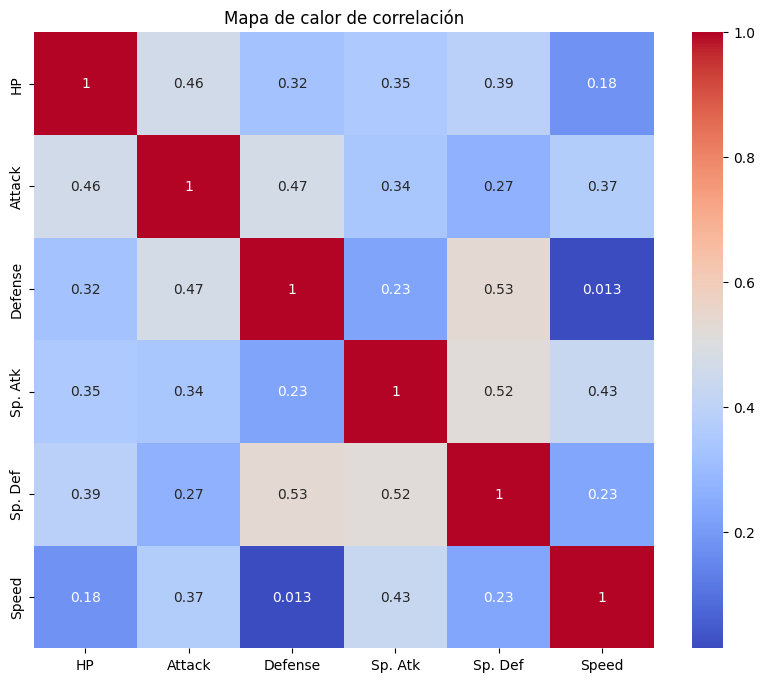

In [ ]:
# Realizamos un análisis de correlación entre las variables numéricas en el dataset
correlation_matrix = df2.corr()

# Imprime la matriz de correlación
print(correlation_matrix)

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Agregar un título al gráfico
plt.title('Mapa de calor de correlación')

# Mostrar el mapa de calor
plt.show()

###Análisis de la Matriz de Correlación:
Correlaciones más Fuertes:\
-La correlación más fuerte en la matriz se encuentra entre "Defensa" y "Sp. Def" con un valor de aproximadamente 0.535. Esto sugiere que los Pokémon con una alta defensa también tienden a tener una especial defensa alta.\
-Otra correlación fuerte se observa entre "Sp. Atk" y "Sp. Def" con un valor de aproximadamente 0.518, lo que indica que los Pokémon con una especial ataque alta tienden a tener una especial defensa alta.

Correlaciones Moderadas:\
-Se encuentran correlaciones moderadas entre "HP" y "Ataque" (0.463), "Ataque" y "Defensa" (0.469), "Sp. Atk" y "Speed" (0.432), "HP" y "Sp. Def" (0.389), "HP" y "Sp. Atk" (0.351), y "Ataque" y "Speed" (0.371).\
-Estas correlaciones tienen relaciones significativas, pero no son extremadamente fuertes.

Correlaciones cercanas a cero o bajas:\
-La correlación entre "Speed" y "Defense" es muy baja (0.013), lo que indica una falta de correlación significativa entre estas dos estadísticas.\
Estas  variables tienen poca influencia mutua.

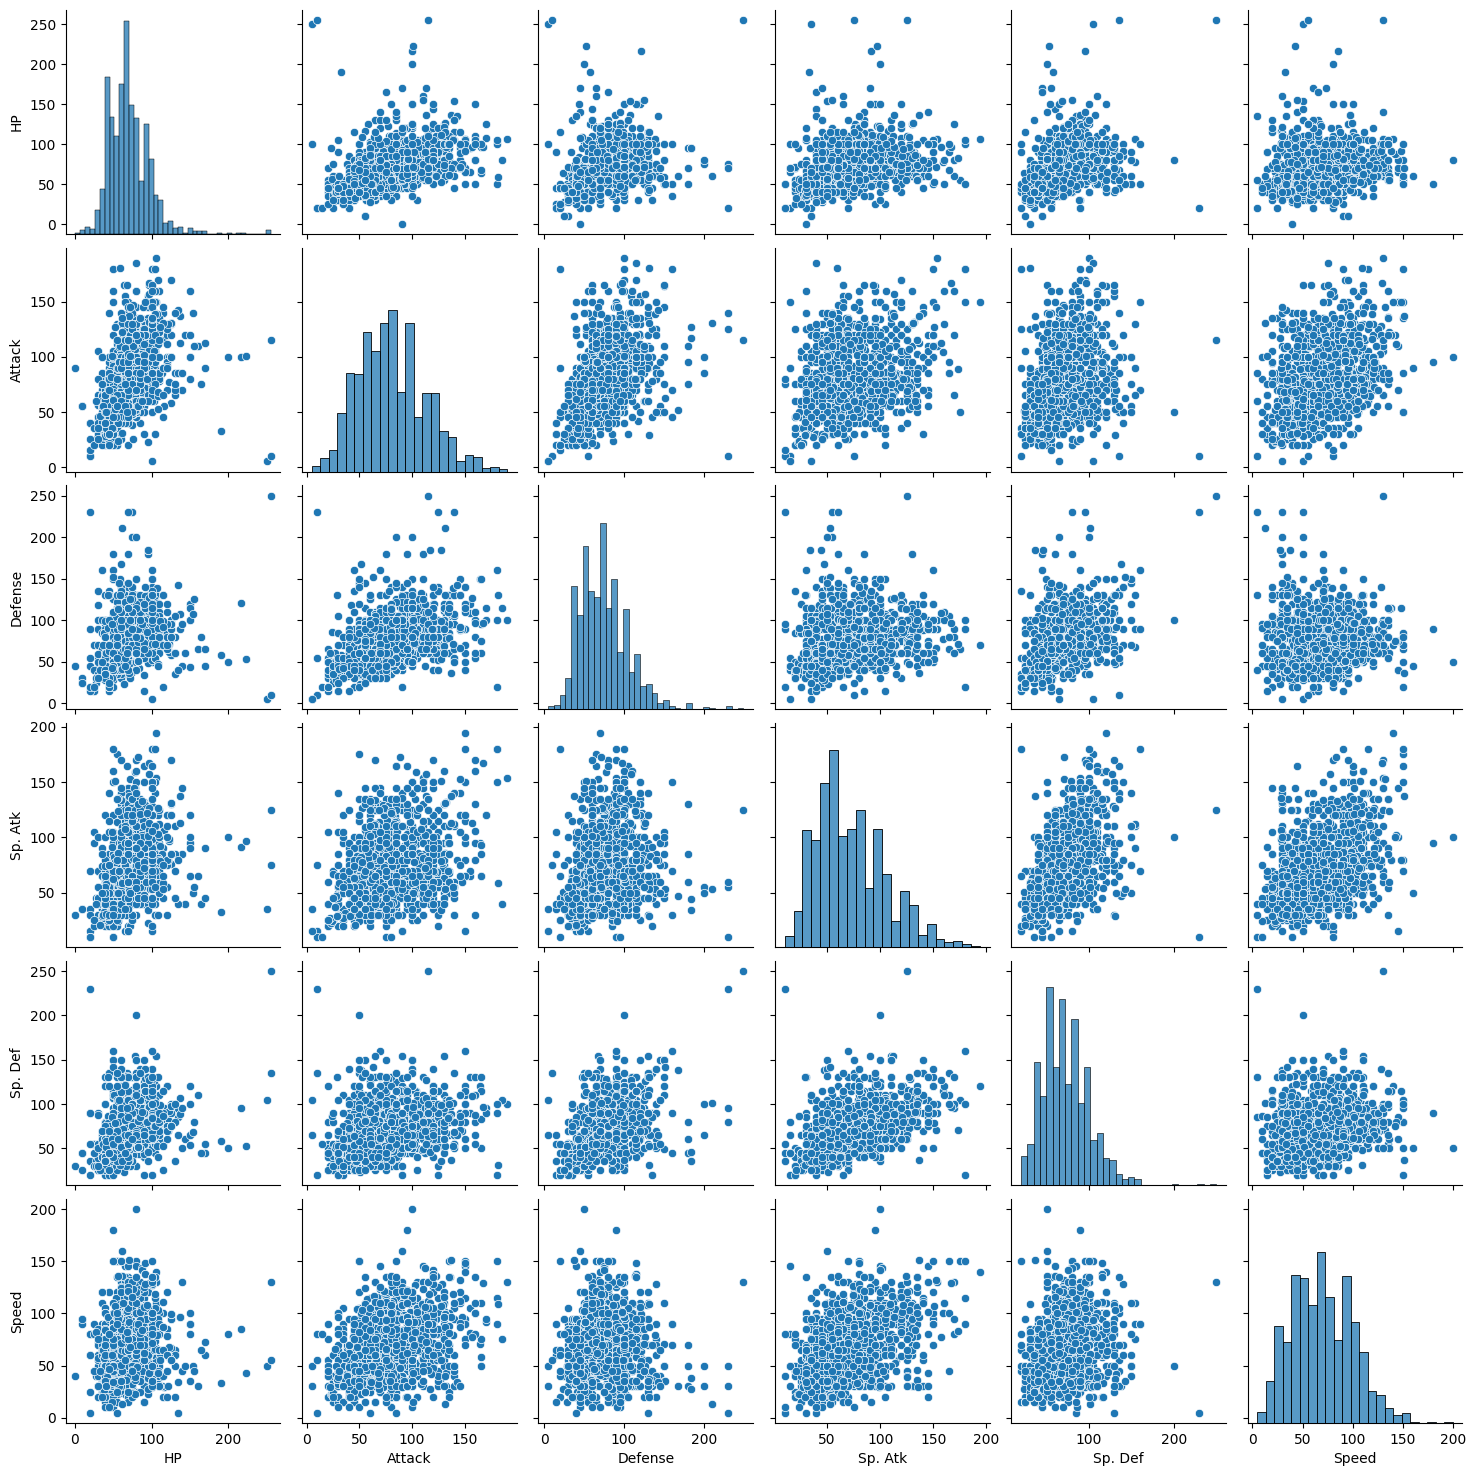

In [ ]:
# Creamos un pairplot para visualizar relaciones entre pares de variables numéricas
sns.pairplot(df2)

Se observa una falta de correlación:  los puntos están dispersos al azar sin una tendencia clara en la mayoria de las variables.

Además, observamos que todas las variables siguen una distribución normal.

###Estandarización
-Dado que las variables están normalmente distribuidas, decidimos usar z-score.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Definimos las columnas numéricas
columnas_numericas = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Estandarizamos las columnas numéricas
df2[columnas_numericas] = scaler.fit_transform(df2[columnas_numericas])

In [ ]:
df2

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,-0.961965,-0.995385,-0.833294,-0.237596,-0.255210,-0.817967
1,Ivysaur,Grass,-0.403828,-0.590478,-0.377347,0.221894,0.287758,-0.321141
2,Venusaur,Grass,0.340354,0.032455,0.274006,0.834547,1.011716,0.341293
3,Venusaur,Grass,0.340354,0.593096,1.576713,1.508465,1.735674,0.341293
4,Charmander,Fire,-1.185219,-0.901945,-1.028700,-0.390759,-0.798179,-0.155533
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,-0.589874,-0.029838,0.176303,1.906689,1.735674,1.003727
1186,Roaring Moon,Dragon,1.270581,1.807816,-0.116806,-0.543923,1.047914,1.633039
1187,Iron Valiant,Fairy,0.117099,1.527496,0.501980,1.447199,-0.436200,1.533674
1188,Koraidon,Fighting,1.084536,1.683229,1.316172,0.375057,1.011716,2.162986


###EJERCICIO 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree
from graphviz import Source

# Codificar las etiquetas de tipos de Pokémon a valores numéricos
df2['Type_encoded'] = df2['Type'].map(target_names)

# Seleccionar las características y las etiquetas
X = np.array(df2[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
y = np.array(df2['Type_encoded'])

# Nombres de las características
feature_names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Crear un clasificador de árbol de decisión con hiperparámetros específicos
tree_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_clf.fit(X_train, y_train)

# Generar un archivo DOT para visualizar el árbol de decisión
#export_graphviz(tree_clf, out_file="Pokemon.dot", feature_names=feature_names, class_names=df2['Type'].unique(), rounded=True, filled=True)

# Crear una fuente desde el archivo DOT para visualizar el árbol
#Source.from_file("Pokemon.dot")

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

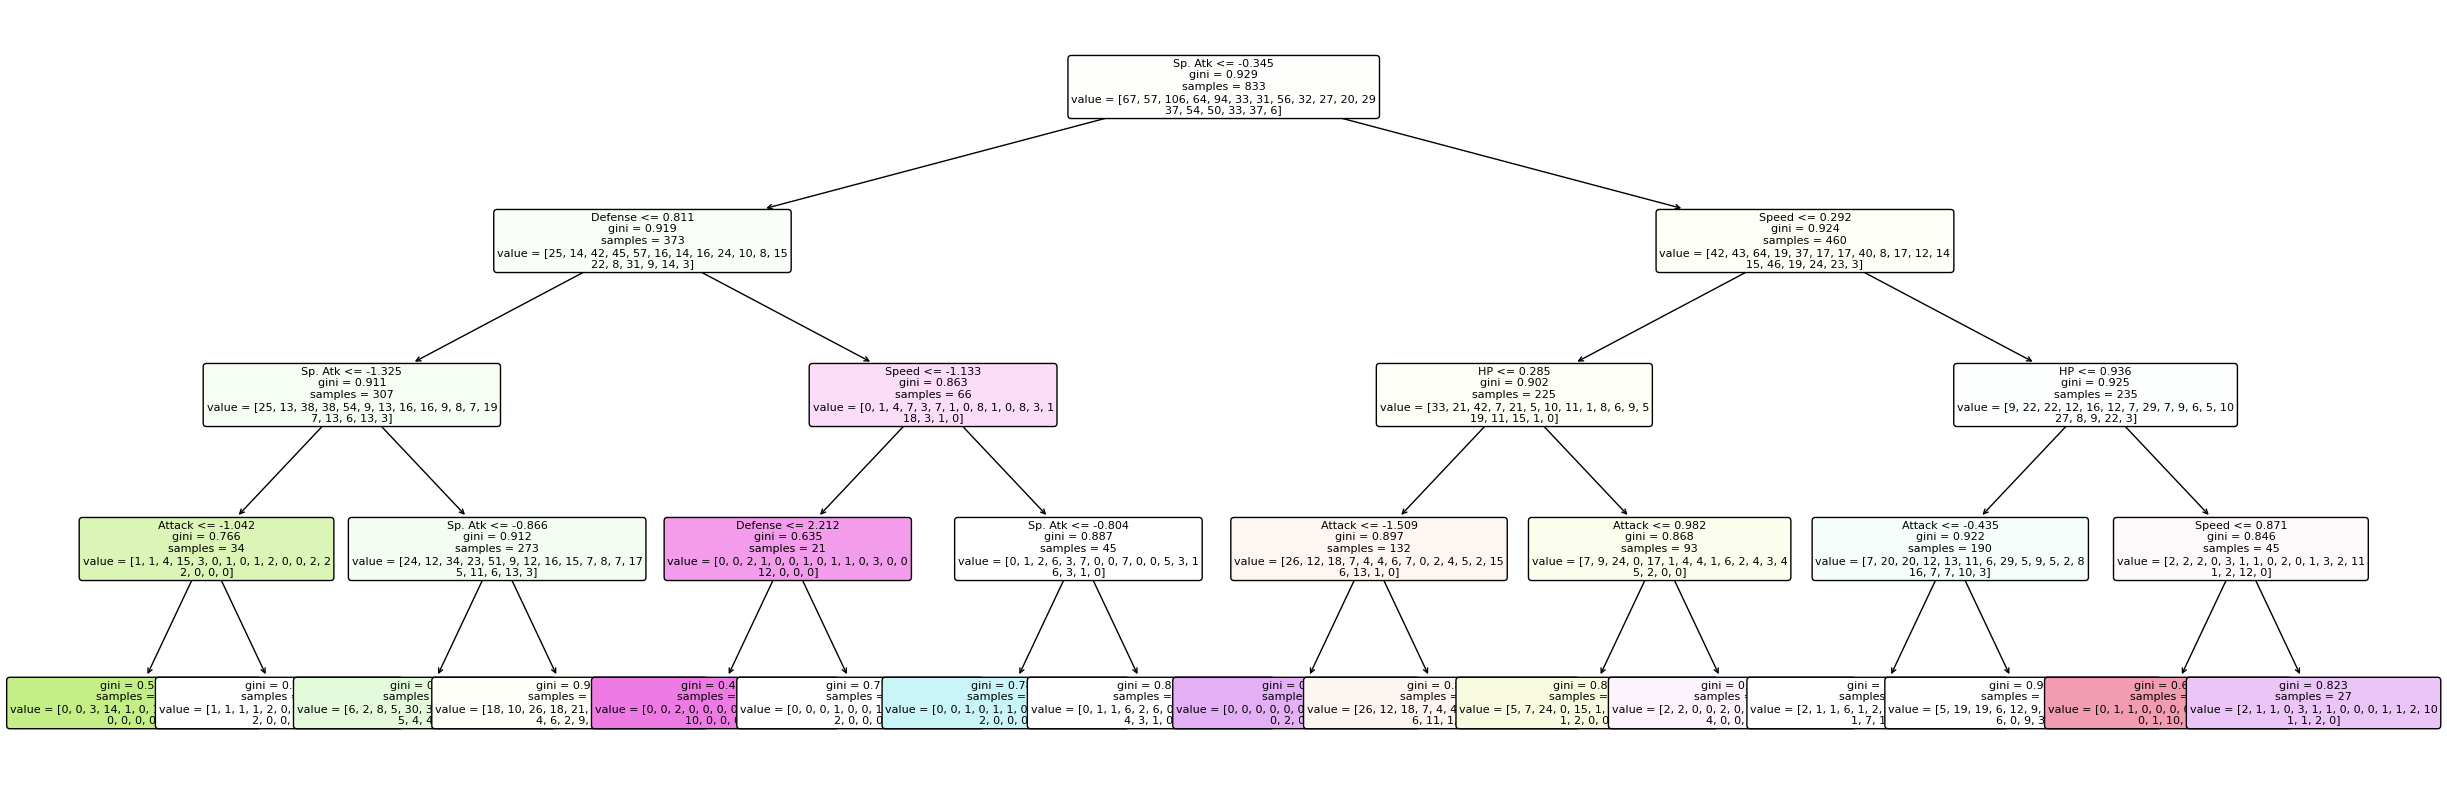

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(tree_clf,
               feature_names=feature_names,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Árbol con hiperparámetros por default. Mas adelante vemos como cambia con los hiperparámetros más óptimos.

In [ ]:
# Obtener los valores únicos en la columna 'Type_encoded'
unique_encoded_types = df2['Type_encoded'].unique()

# Crear una lista de valores enteros del 0 al 17
integer_values = list(range(0, 18))
unique_encoded_types
# Los valores únicos representan las clases de los tipos de Pokémon codificadas,
# mientras que la lista de enteros es una forma de representar las clases numéricamente.

# unique_encoded_types contendrá los valores únicos de clases de tipos de Pokémon
# integer_values contendrá una secuencia de enteros del 0 al 17, que se utilizan como identificadores de clases.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [ ]:
target_names

{'Grass': 0,
 'Fire': 1,
 'Water': 2,
 'Bug': 3,
 'Normal': 4,
 'Dark': 5,
 'Poison': 6,
 'Electric': 7,
 'Ground': 8,
 'Ice': 9,
 'Fairy': 10,
 'Steel': 11,
 'Fighting': 12,
 'Psychic': 13,
 'Rock': 14,
 'Ghost': 15,
 'Dragon': 16,
 'Flying': 17}

In [ ]:
# Predicción en el conjunto de entrenamiento
clf_predictions_train = tree_clf.predict(X_train)

# Predicción en el conjunto de prueba
clf_predictions = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, clf_predictions_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test, clf_predictions)

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

Precisión en el conjunto de entrenamiento: 0.2424969987995198
Precisión en el conjunto de prueba: 0.13725490196078433


El modelo solo clasifica correctamente alrededor del 24% de las muestras en el conjunto de entrenamiento. Esto podría indicar que el modelo está teniendo dificultades para ajustarse a los datos de entrenamiento y no está capturando bien los patrones en ellos.\
La precisión en el conjunto de prueba es aún más baja, alrededor del 13.72%. Esto es un indicativo de que el modelo no generaliza bien a datos nuevos y desconocidos, lo que significa que su rendimiento es deficiente en la tarea de clasificación de datos que no ha visto durante el entrenamiento.

Probamos nuestro modelo sobre dos
conjuntos de test. 20% y 30%

In [ ]:
# Dividir datos en test y train. 20%-80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.13865546218487396,

Precision: 0.12029850401699141,

Recall: 0.13865546218487396,

F1: 0.11108391236158636

In [ ]:
# Dividir datos en test y train. 30%-70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.13725490196078433,

Precision: 0.11778360536514067,

Recall: 0.13725490196078433,

F1: 0.10851968624582949

OPTIMIZACIÓN DE HIPERPARÁMETROS

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# max_depth: La profundidad máxima del árbol.
# max_features: El número máximo de características a considerar para cada división. Suele ser la raíz cuadrada del número de características.
# min_samples_split: El número mínimo de muestras necesarias para dividir un nodo interno.
# random_state: Semilla para la generación de números aleatorios.


# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_features': [3, 5, 6, 7, 9],
    'max_depth': [6, 9, 10, 11],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_grid, n_iter=100, random_state=42, n_jobs=-1)


# Entrenar el modelo con los mejores hiperparámetros encontrados
random_search.fit(X_train, y_train)
# Realiza la búsqueda aleatoria en los datos de entrenamiento para encontrar los mejores hiperparámetros.
# Luego, ajusta un nuevo modelo de árbol de decisión con estos mejores hiperparámetros.

best_params = random_search.best_params_  # Obtiene los mejores hiperparámetros encontrados
best_tree_clf = DecisionTreeClassifier(**best_params)  # Crea un nuevo modelo con los mejores hiperparámetros
best_tree_clf.fit(X_train, y_train)  # Entrenar el nuevo modelo

# Realiza predicciones en el conjunto de prueba
best_predictions = best_tree_clf.predict(X_test)


# Calcula la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, best_predictions)
# Calcula la precisión del modelo en el conjunto de prueba y almacenarla en "test_accuracy".

print(f'Mejores hiperparámetros: {best_params}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
# Imprimir los mejores hiperparámetros encontrados y la precisión en el conjunto de prueba.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros: {'min_samples_split': 2, 'max_features': 5, 'max_depth': 10}
Precisión en el conjunto de prueba: 0.1876750700280112


La precisión en el conjunto de prueba separando el modelo 70%-30% es de aproximadamente 18.76%. Esto indica que el modelo con los hiperparámetros encontrados durante la búsqueda aleatoria tiene un rendimiento ligeramente mejor que el modelo original con hiperparámetros fijos, siendo con este 13.72%. Sin embargo, la precisión sigue siendo relativamente baja.
Separando el modelo 80%-20% la precision en el conjunto de prueba con los mejores  hiperparámetros es de 14.28%, siendo mejor que el modelo original con parámetros fijos, teniendo con este 13.86%\
Por eso, consideramos que seria idealmente realizar una separación 70%-30% del modelo en entrenamiento y prueba.

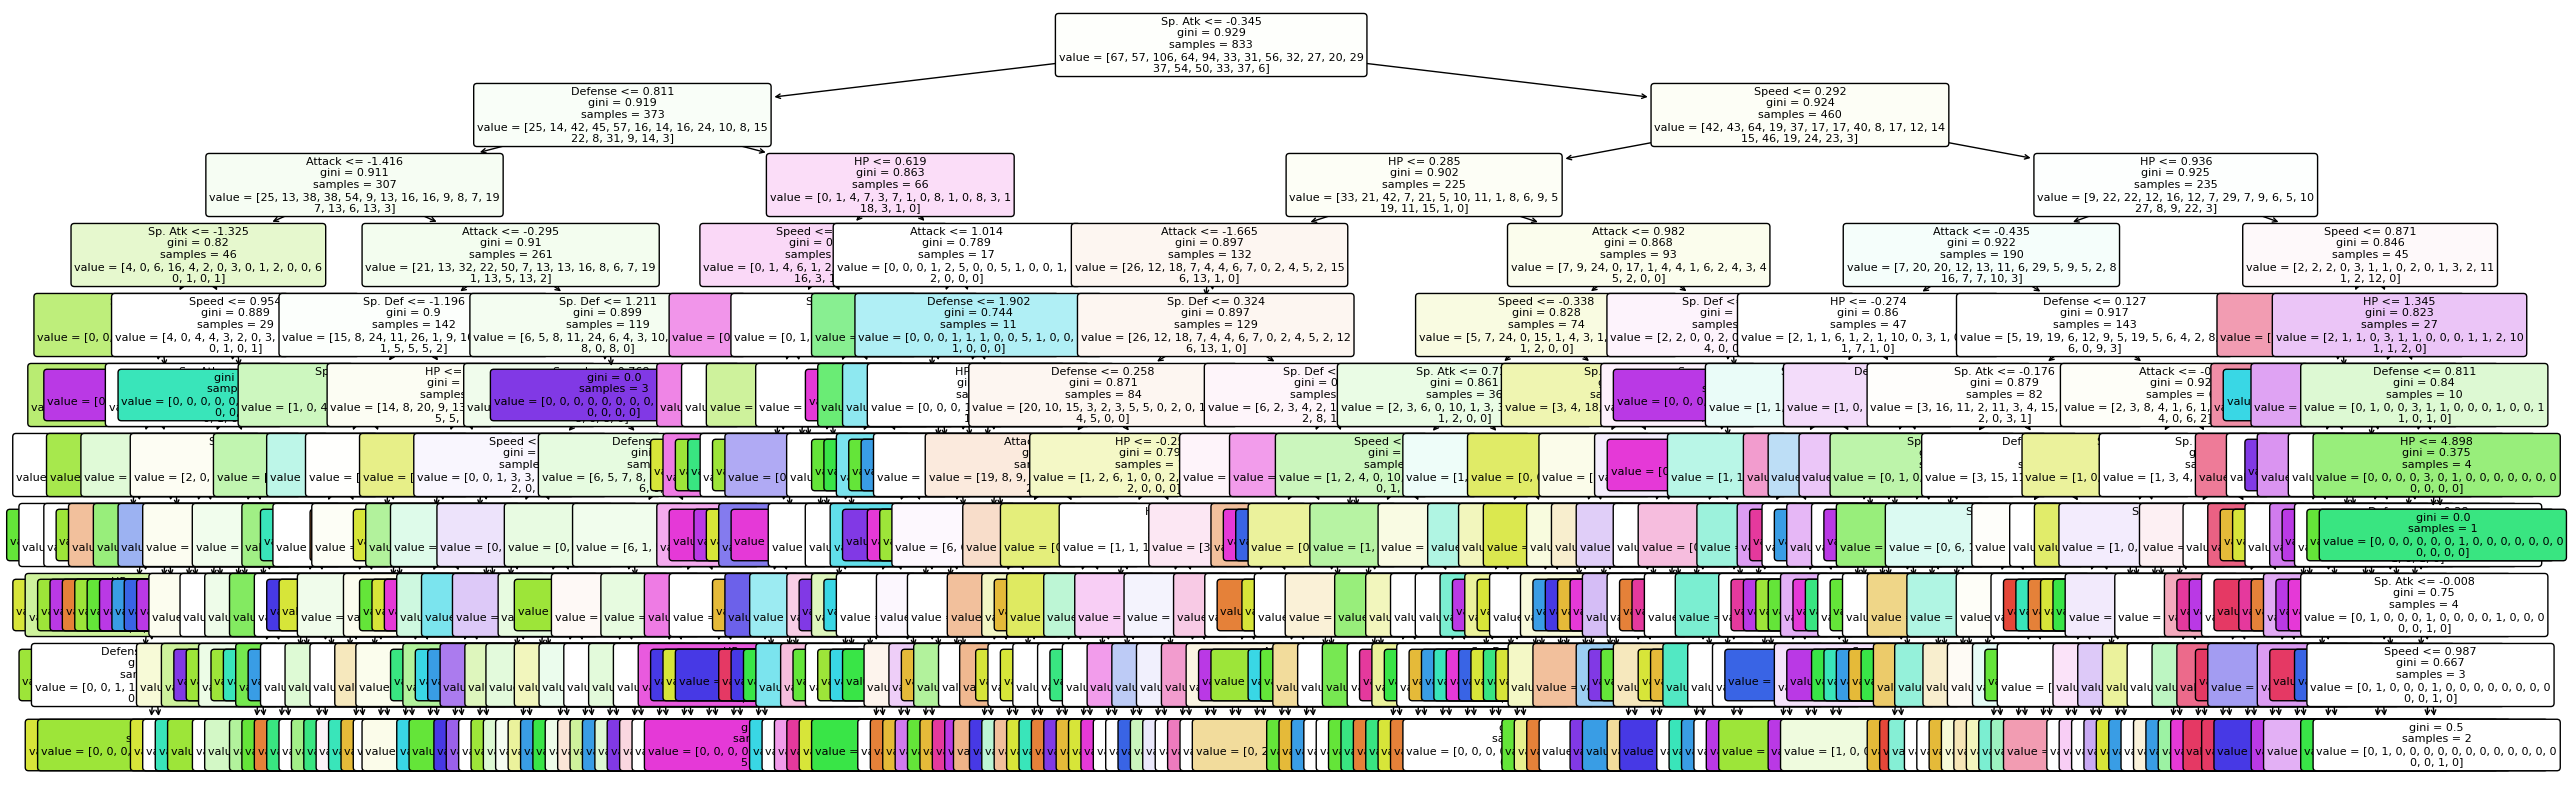

In [ ]:
# Crear un clasificador de árbol de decisión con hiperparámetros específicos
tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_split= 2,max_features= 5, random_state=18)

# Entrenar el modelo con los datos de entrenamiento
tree_clf.fit(X_train, y_train)
plt.figure(figsize=(30,10))
plot_tree(tree_clf,
               feature_names=feature_names,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Árbol con optimización de hiperparámetros.La primer clasificación la hace con 'Sp. Attack', luego con 'Defense' y 'Speed' también son importantes para clasificar, lo podemos ver más abajo en el siguiente gráfico también. Podemos observar que tiene mas profundidad que el gráfico anterior.

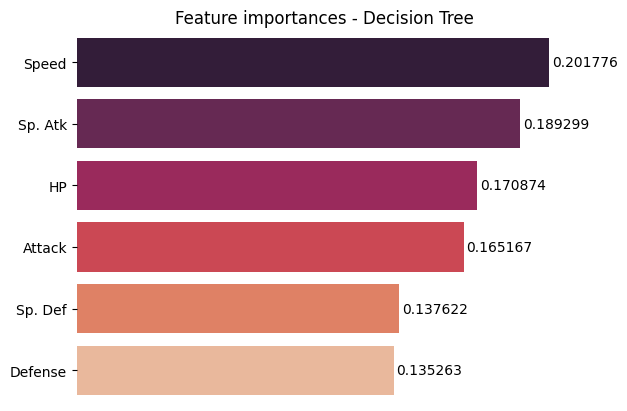

In [ ]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_names, 'importances': tree_clf.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

Este gráfico muestra que las variables que hacen mejor la división del árbol son  'Speed', 'Sp. Atk' y 'Hp'

MÉTRICAS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Inspeccionar el objeto del modelo
print("Atributos del modelo:")
print(f"Profundidad máxima: {tree_clf.max_depth}")
print(f"número mínimo de muestras necesarias para dividir un nodo interno: {tree_clf.min_samples_split}")
print(f"Número mínimo de muestras por hoja: {tree_clf.min_samples_leaf}")



# Realizar predicciones
y_pred = tree_clf.predict(X_test)


Atributos del modelo:
Profundidad máxima: 10
número mínimo de muestras necesarias para dividir un nodo interno: 2
Número mínimo de muestras por hoja: 1


In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='macro')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='macro')

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='macro')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

print(f'Precisión: {accuracy}')
print(f'Precisión macro: {precision}')
print(f'Recall macro: {recall}')
print(f'F1-score macro: {f1}')
print('Matriz de Confusión:')
print(confusion)

Precisión: 0.18207282913165265
Precisión macro: 0.16186427663784575
Recall macro: 0.15554385808417906
F1-score macro: 0.1478627009965267
Matriz de Confusión:
[[ 5  0 11  3  4  0  1  5  0  1  0  1  0  1  1  1  2  1]
 [ 3  9  3  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0]
 [ 9  2 13  1  1  1  2  0  0  1  2  0  1  5  0  1  4  0]
 [ 0  0  4  6  5  0  1  1  0  2  0  2  1  1  2  2  0  0]
 [ 1  0  7  2 12  2  0  0  0  4  0  1  2  2  0  2  2  0]
 [ 0  4  4  0  6  1  2  1  0  0  0  0  1  1  1  0  1  1]
 [ 0  1  2  1  6  0  1  0  0  0  0  0  0  2  0  1  1  0]
 [ 1  2  3  1  0  0  2  2  0  2  0  0  0  2  0  0  2  0]
 [ 1  2  2  0  3  0  0  0  1  0  0  1  0  0  3  1  0  0]
 [ 3  2  5  0  1  0  1  0  1  1  0  0  0  1  0  0  1  0]
 [ 0  0  5  0  2  1  0  0  0  0  0  0  1  1  1  0  0  0]
 [ 2  0  1  1  0  0  1  0  1  1  0  1  0  1  4  0  1  0]
 [ 1  1  2  0  3  0  1  0  0  1  0  0  2  0  0  1  0  0]
 [ 6  2  5  0  3  1  0  1  0  0  1  0  0  4  2  0  2  1]
 [ 3  1  4  0  5  0  0  0  1  0  0  2  0  0 

In [ ]:
print(f'Accuracy: {accuracy},\n\nPrecision: {precision},\n\nRecall: {recall},\n\nF1 {f1}') #parametros por default

Precisión en el conjunto de prueba: 0.13231552162849872

In [ ]:
print(f'Accuracy: {accuracy},\n\nPrecision: {precision},\n\nRecall: {recall},\n\nF1 {f1}') #con optimizacion de parametros

Accuracy: 0.18207282913165265,

Precision: 0.16186427663784575,

Recall: 0.15554385808417906,

F1 0.1478627009965267



Accuracy:  la precisión es aproximadamente 0.1820, lo que significa que el modelo acierta alrededor del 18.20% de las veces. El modelo tiene un bajo rendimiento en términos de precisión, ya que la mayoría de las predicciones son incorrectas.

Precisión:  el valor de precisión es aproximadamente 0.1618, lo que indica que de todas las predicciones positivas realizadas por el modelo, solo alrededor del 16.18% son correctas. Esto también muestra un rendimiento deficiente en la capacidad del modelo para identificar verdaderos positivos.

Recall: el valor de recall es aproximadamente 0.1555, lo que significa que el modelo solo logra capturar alrededor del 15.55% de los casos positivos reales

F1-Score: el valor de F1-Score es aproximadamente 0.1478, lo que refleja el bajo rendimiento general del modelo en términos de ambas métricas (precisión y recall). Un valor bajo de F1-Score indica un mal rendimiento en la clasificación.

 Estos valores son relativamente bajos, lo que indica que el modelo tiene un rendimiento deficiente en la tarea de clasificación.

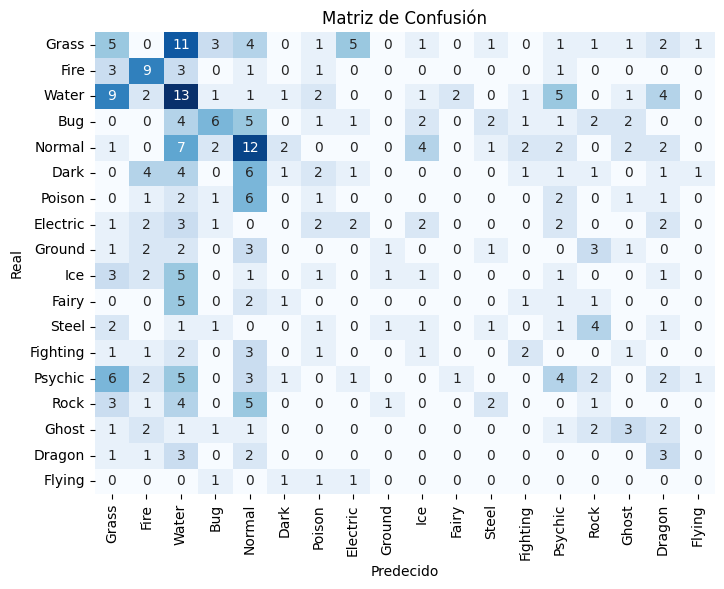

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Etiquetas de clases (adapta a tus nombres de clases)
class_labels = df2['Type'].unique()

# Crear una figura para mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


Analicemos la matriz de confusión:
El modelo ha logrado clasificar algunas muestras correctamente en varias de las clases, como se observa en la diagonal principal de la matriz. Por ejemplo, ha clasificado correctamente \
Clase 1: 12 muestras\
Clase 2: 0 muestras\
Clase 3: 3 muestras\
Clase 4: 1 muestra\
Clase 5: 21 muestras\
Clase 6: 0 muestras

Sin embargo, también se observan numerosas clasificaciones incorrectas en la matriz fuera de la diagonal principal. Por ejemplo:\
Clase 1: Se clasificaron incorrectamente como Clase 2 (2 muestras), Clase 3 (4 muestras), Clase 7 (1 muestra).\
Clase 2: Se clasificaron incorrectamente como Clase 1 (6 muestras), Clase 7 (7 muestras), Clase 9 (1 muestra).\
Clase 3: Se clasificaron incorrectamente como Clase 1 (9 muestras), Clase 2 (3 muestras), Clase 4 (1 muestra), Clase 6 (2 muestras),\
 Clase 9 (1 muestra).\
Clase 4: Se clasificaron incorrectamente como Clase 1 (6 muestras), Clase 3 (3 muestras), Clase 5 (1 muestra).

Algunas clases parecen ser más difíciles de clasificar que otras, ya que se observan más clasificaciones incorrectas en ciertas filas y columnas.

CONCLUSIÓN:
Esta matriz de confusión muestra que este modelo tiene dificultades para clasificar correctamente las muestras en muchas de las clases, ya que hay varios valores fuera de la diagonal principal.


# Ejercicio 5
# Naive Bayes
Naive Bayes es un modelo de clasificación. Supone que los predictores son condicionalmente independientes. Viendo la matriz de correlación, un valor máximo de 0.5 en esta nos permite tomar la conclusión de que este método no tendrá problemas mayores con la correlación.

## Discretización
Todas las variables explicativas son contínuas, para poder usar Bayes ingenuo debemos discretizarlas, por lo que nuestra primera decisión será decidir la cantidad de bins a utilizar
### Criterios de discretización
La cátedra no nos brindó directamente con criterios para decidir cuántos bins usar, sin embargo, decidimos probar con las siguientes técnicas
- Regla de la raíz: La cantidad de beams a utilizar será la raíz cuadrada de la cantidad de registros. $\sqrt{1190} \approx 34 $ bins.
- Regla de Sturges: Suponiendo que la distribución de las variables son normales, que lo son, podemos determinar la cantidad de beams mediante la fórmula $1 + \log_2(1190) \approx 11$

Teniendo en cuenta que el rango va de 0 a 256, decidimos que cantidades de rangos lógicas serían 8 y 16, potencias de 2. Incluso más adelante podemos utilizar técnicas de optimización de hiperparámetros. Por ahora quedemonos con 8.

In [ ]:
# Definimos el rango
common_min = 0
common_max = 255
n_bins = 8
numerical = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df2_discrete = df2.copy()

for column in numerical:
  bin_edges = np.linspace(common_min, common_max, n_bins + 1)
  df2_discrete[column] = np.digitize(df2[column], bin_edges) - 1


In [ ]:
type_list = list(df2_discrete['Type'].unique())
target_names = {}
for n, type in enumerate(type_list):
  target_names[type] = n

# Codificar
df2_discrete['Type_encoded'] = df2_discrete['Type'].map(target_names)
target_names

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# spliteamos en train y test
Xpokemon = df2_discrete[numerical]
ypokemon = df2_discrete['Type_encoded']

XpokemonTrain, XpokemonTest, ypokemonTrain, ypokemonReal = train_test_split(Xpokemon, ypokemon, test_size=0.3)

In [ ]:
modelNB = GaussianNB()
modelNB.fit(XpokemonTrain, ypokemonTrain)
cm = metrics.confusion_matrix(ypokemonReal, ypokemonPred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Podemos ver en esta matriz de confusión cómo se predijeron los tipos de pokemon. Por lo visto veamos las métricas.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predicción y evaluación

predictions = modelNB.predict(XpokemonTest)

# Calcular la accuracy
accuracy = accuracy_score(ypokemonReal, predictions)
# Calcular la precisión
precision = precision_score(ypokemonReal, predictions, average='macro')

# Calcular el recall
recall = recall_score(ypokemonReal, predictions, average='macro')

# Calcular el F1-score
f1 = f1_score(ypokemonReal, predictions, average='macro')

print(f'Precisión: {accuracy}')
print(f'Precisión macro: {precision}')
print(f'Recall macro: {recall}')
print(f'F1-score macro: {f1}')

print(classification_report(ypokemonReal, predictions))

# Conclusiones
Vemos que los primeros resultados usando Naive Bayes no han sido satisfactorios, la precisión es muy baja (0.17) como para considerar mejoras del modelo. El análisis sobre las métricas es el mismo a aquel realizado para los resultados de clasificación usando árboles. A esto se le puede agregar a que se aprecia una gran variación de las métricas, algunas teniendo métricas cero (clases con pocos registros) mientras otras tienen valores mucho mayores. Esto es un problema propio del método NB ante este tipo de datasets:

El hecho de que contamos con muy pocos registros para predecir una cantidad tan alta de clases y que el dataset está desbalanceado influye negativamente en la performance de nuestro modelo. Esto es una de las principales debilidades de este método, la frecuencia cero.

Sin embargo podemos optar por diferentes medidas para intentar mejorar la predicción:
- Criterio de división de los atributos: Podemos usar técnicas de optimización para hallar la cantidad óptima de bins, o considerar una división no uniforme teniendo en cuenta que todas las columnas tienen una distribución normal.
- Utilizar otro tipo de NB: Hemos visto GaussianNB, MultinomialNB y BernoulliNB. Según visto en la distribución de nuestros datos, al ser todos gaussianos utilizar otro distinto a GaussianNB carece de sentido.
- Balancear las clases: la única manera de hacer esto es quitando clases con pocos registros, o quedarnos con las clases que más tengan registros, ya que el desbalanceo es muy grande.

Veamos ahora los resultados en otro conjunto de test

In [ ]:
XpokemonTrain, XpokemonTest, ypokemonTrain, ypokemonReal = train_test_split(Xpokemon, ypokemon, test_size=0.2)
modelNB = GaussianNB()
modelNB.fit(XpokemonTrain, ypokemonTrain)
predictions = modelNB.predict(XpokemonTest)

# Calcular la accuracy
accuracy = accuracy_score(ypokemonReal, predictions)
# Calcular la precisión
precision = precision_score(ypokemonReal, predictions, average='macro')

# Calcular el recall
recall = recall_score(ypokemonReal, predictions, average='macro')

# Calcular el F1-score
f1 = f1_score(ypokemonReal, predictions, average='macro')

print(f'Precisión: {accuracy}')
print(f'Precisión macro: {precision}')
print(f'Recall macro: {recall}')
print(f'F1-score macro: {f1}')

print(classification_report(ypokemonReal, predictions))

Como podemos ver, en el dataset que contamos al tomar un conjunto de test más chico logramos peores métricas, debido a las particularidades mencionadas anteriormente del dataset.

###Ejercicio 6

K-NN

Estuvimos probando diferentes formas de dividir el conjunto de datos en entrenamiento y prueba

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba. 20%-80%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=42)

Precisión del modelo: 0.20

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba. 30%-70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Precisión del modelo: 0.20

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba. 50%-50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

Precisión del modelo: 0.17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el clasificador KNN (K=11 en este caso)
knn_model = KNeighborsClassifier(n_neighbors=11)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
from sklearn.metrics import classification_report


# Realizar predicciones en el conjunto de prueba
predictions = knn_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, predictions))

Precisión del modelo: 0.20

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.15      0.22      0.18        37
           1       0.24      0.50      0.33        18
           2       0.16      0.30      0.21        43
           3       0.21      0.22      0.22        27
           4       0.32      0.51      0.40        37
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        15
           7       0.13      0.12      0.12        17
           8       0.12      0.07      0.09        14
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        11
          11       0.14      0.07      0.10        14
          12       0.25      0.25      0.25        12
          13       0.09      0.04      0.05        28
          14       0.17      0.18      0.17        17
          15       0.20      0.14      0.17        14
          16       0.17    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En este caso, la precisión es baja, lo que indica que el modelo tiende a hacer muchas predicciones incorrectas de la clase positiva.

Mejores hiperparámetros por GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Inicializar el clasificador KNN
knn_model_GSCV = KNeighborsClassifier()

# Definir los parámetros a ajustar
parametros_grid = {'n_neighbors':  range(1, 55, 2),
                   'p':[1,2],
                   'weights': ['uniform', 'distance'] }

# Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(estimator = knn_model_GSCV,
                           param_grid = parametros_grid,
                           cv=5,
                           scoring='accuracy')

In [ ]:
# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
mejor_modelo = grid_search.best_estimator_

Mejores hiperparámetros: {'n_neighbors': 33, 'p': 1, 'weights': 'distance'}


In [ ]:
# Realizar predicciones en el conjunto de prueba
pred = mejor_modelo.predict(X_test)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, pred))

Precisión del modelo: 0.20

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.12      0.11      0.11        37
           1       0.17      0.28      0.21        18
           2       0.19      0.35      0.24        43
           3       0.20      0.19      0.19        27
           4       0.27      0.59      0.37        37
           5       0.00      0.00      0.00        23
           6       1.00      0.07      0.12        15
           7       0.20      0.29      0.24        17
           8       0.50      0.07      0.12        14
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        11
          11       0.14      0.07      0.10        14
          12       0.23      0.25      0.24        12
          13       0.09      0.04      0.05        28
          14       0.17      0.24      0.20        17
          15       0.50      0.14      0.22        14
          16       0.15    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Conclusión

Durante nuestro análisis, exploramos distintos porcentajes de entrenamiento y prueba, como el 20%-80% y el 30%-70% y 50%- 50%. También variamos diferentes parámetros, incluyendo el número de vecinos, que osciló entre 3 y 63, el parámetro de potencia utilizado en la métrica de Minkowski, y diferentes enfoques para ponderar las distancias.

El valor promedio más alto de precisión que logramos alcanzar fue 0.20, el cual validamos mediante el uso de GridSearchCV. Es importante destacar que este valor es relativamente bajo, pero se debe en gran medida a la escasez de registros en comparación con la diversidad de clases presentes en un conjunto de datos totalmente desbalanceado, por ej , 'flying'  la mas baja  y 'Grass' y la mas alta;por la misma razón por la cual NB tampoco predice bien. Asimismo, observamos que en casos donde hay una menor cantidad de datos disponibles, la clasificación se vuelve más desafiante o incluso imposible, por ejemplo en el caso 17, donde la precisión da 0. Y notamos que en los casos que hay mas datos la precisión puede llegar a 1.00, como en el caso 6 por ejemplo.

# Conclusión final
En este trabajo pudimos aplicar los conocimientos aprendidos de árboles de decisión tanto para clasificación y para regresión, y también métodos de clasificación como Naive Bayes y KNN.
Trabajamos sobre dos datasets:
- Sobre el primero, aplicamos árboles de regresión, los cuales tuvieron un resultado casi perfecto (error muy bajo) principalmente debido a la correlación de las variables.
- Sobre el segundo, ninguno de los tres métodos: árbol de decision, Naive Bayes y KNN resultaron satisfactorios, esto es debido a el dataset con el que trabajamos, tenía muy pocos registros para la alta cantidad de clases a predecir.